<a href="https://colab.research.google.com/github/erickvaldezsallagos/Codigo-serie-de-Fourier/blob/main/ecdeonda_sv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ \frac{∂^2u}{∂t^2}=c^2(\frac{\partial^2 u}{∂x^2}+ \frac{∂^2 u}{∂y^2})$$
que satisfaga la condicion en la frontera
$$u=0$$ en la frontera de la membrana para todo t mayor o igual a 0

CI.
$$u(x,y,0)=f(x,y)$$ [dado el desplazamiento inicial f(x, y)]
$$\frac{∂u}{∂t}=g(x, y)$$ (evaluada en t=0)

Solucion:

Por separacion de variables
$$U(x,y,t)=X(x)Y(y)T(t)$$
Sustituimos en la ecuacion de onda
$$X(x)Y(y)T'(t)=c^2 (X''(x)Y(y)T(t)+X(x)Y´´(y)T(t))$$

Proponemos la separación

$$\frac{X''}{X}=-\mu \quad $$ y $$ \quad \frac{Y''}{Y}=k+\mu$$

Obtenemos las 3 ecuaciones

$$X''+\mu X=0 \quad X(0)=X(4)=0$$

$$Y''-(k+\mu)Y=0 \quad Y(0)=Y(2)=0$$

$$T''-c^2kT=0$$

Donde las primeras 2 ecuaciones corresponden a problemas de STURM-LIOVILLE

Así

$$X_n(x)=sen(\frac{n\pi x}{4})$$

$$Y_m(y)=sen(\frac{m\pi y}{2})$$

$$T_{mn}(t)=A_{mn}cos(c\sqrt{K_{mn}}t)$$

Y la solución general es

$$u(x, y, t) = \sum_{m=1}^{\infty} \sum_{n=1}^{\infty}
B_{mn} \cos\left( c \sqrt{ \left( \frac{n\pi}{4} \right)^2 + \left( \frac{m\pi}{2} \right)^2 } \, t \right)
\sin\left( \frac{n\pi x}{4} \right) \sin\left( \frac{m\pi y}{2} \right)$$

Donde el coeficiente $B_{mn}$ se calcula como

$$B_{mn} = \frac{4}{ab \lambda_{mn}} \int_0^b \int_0^a g(x, y) \sin\left( \frac{m\pi x}{a} \right) \sin\left( \frac{n\pi y}{b} \right) dx\,dy$$

Y tiene eigenvalores como
$$
\lambda = \lambda_{mn} = c \pi \sqrt{ \frac{m^2}{a^2} + \frac{n^2}{b^2} }, \quad m = 1, 2, \ldots,\quad n = 1, 2, \ldots
$$

$$\text{donde } m = 1, 2, \ldots \quad \text{y} \quad n = 1, 2, \ldots$$

Usando la condición inicial

$$u(x,y,0)=\sum_{m=1}^{\infty} \sum_{n=1}^{\infty}
A_{mn}\sin\left( \frac{n\pi x}{4} \right) \sin\left( \frac{m\pi y}{2} \right)=f(x,y)$$

Obteniendo la serie de Fourier de $f(x,y)$ para obtener el coeficiente $A_{mn}$


$$B_{mn} = \frac{8}{4} \int_0^4 \int_0^2 0.1(4x - x^2)(2y - y^2)
\sin\left( \frac{n\pi x}{4} \right)
\sin\left( \frac{m\pi y}{2} \right) dy\,dx$$

$$A_{mn}=\frac{102.4}{(n\pi)^3(m\pi)^3}[(-1)^{n+1}+1][(-1)^{m+1}+1]$$

Sustituyendo en la solución general se tiene:


$$u(x, y, t) = \sum_{n=1}^{\infty} \sum_{m=1}^{\infty}
\frac{102.4}{(n\pi)^3(m\pi)^3}[(-1)^{n+1}+1][(-1)^{m+1}+1] \cos\left( c \sqrt{ \left( \frac{n\pi}{4} \right)^2 + \left( \frac{m\pi}{2} \right)^2 } \, t \right)
\sin\left( \frac{n\pi x}{4} \right) \sin\left( \frac{m\pi y}{2} \right)$$

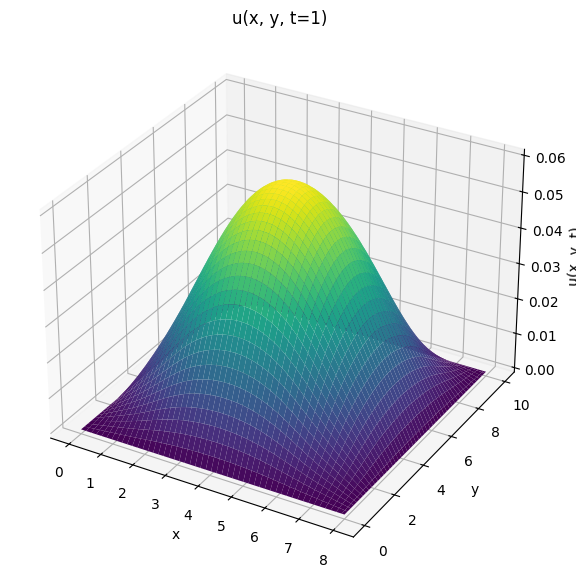

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

c = 2
a = 8
b = 10
N = 10
M = 10
t = 1

x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
X, Y = np.meshgrid(x, y)


U = np.zeros_like(X)

const = 102.4 / (np.pi**6)


for n in range(1, N+1):
    for m in range(1, M+1):
        parity_n = (-1)**(n + 1) + 1
        parity_m = (-1)**(m + 1) + 1

        if parity_n == 0 or parity_m == 0:
            continue

        Amn = const / (n**3 * m**3)

        omega_mn = c * np.sqrt((n * np.pi / a)**2 + (m * np.pi / b)**2)

        term = Amn * np.cos(omega_mn * t) * np.sin(n * np.pi * X / a) * np.sin(m * np.pi * Y / b)

        U += term

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U, cmap='viridis')
ax.set_title(f'u(x, y, t={t})')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y, t)')
plt.show()